# Clustering the Countries by using Unsupervised Learning for HELP International
by match1

Dataset Link (Kaggle): [Unsupervised Learning on Country Data](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data/data)

> **Objective:**
   To categorise the countries using socio-economic and health factors that determine the overall development of the country.

> **About organization:**
   HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

> **Problem Statement:**
   HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

<br>

**Attribute Information:** 
   
Column | Description
--- | ---
`country` | Name of the country
`child_mort` | Death of children under 5 years of age per 1000 live births
`exports` | Exports of goods and services per capita. Given as %age of the GDP per capita
`health` | Total health spending per capita. Given as %age of GDP per capita
`imports` | Imports of goods and services per capita. Given as %age of the GDP per capita
`Income` | Net income per person
`Inflation` | The measurement of the annual growth rate of the Total GDP
`life_expec` | The average number of years a new born child would live if the current mortality patterns are to remain the same
`total_fer` | The number of children that would be born to each woman if the current age-fertility rates remain the same
`gdpp` | The GDP per capita. Calculated as the Total GDP divided by the total population


### Import Necessary Libraries

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

### Load the Dataset

In [197]:
countries_df = pd.read_csv("../data/Country-data.csv")

### Data Exploration and Visualization

In [198]:
countries_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [199]:
countries_df.shape

(167, 10)

In [200]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [201]:
countries_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


It can be seen that the **mean values are generally above the median (50th percentile)** which indicates that the distribution of data might be **positively skewed**.

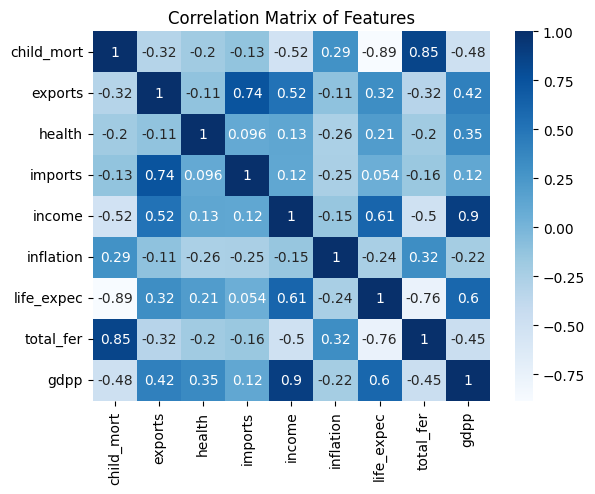

In [202]:
corr_matrix = countries_df.drop(columns=['country']).corr()
sns.heatmap(corr_matrix, annot = True, cmap='Blues')
plt.title("Correlation Matrix of Features")
plt.show()

It can be observed that there are somewhat high positive correlations for the ff:
  - total fertility rate vs child mortality (and that both have negative correlations with income & life expectancy)
  - imports vs exports
  - income vs exports
  - income vs life expectancy
  - income vs GDP per capita
  - GDP per capita vs life expectancy

Income vs Other Factors

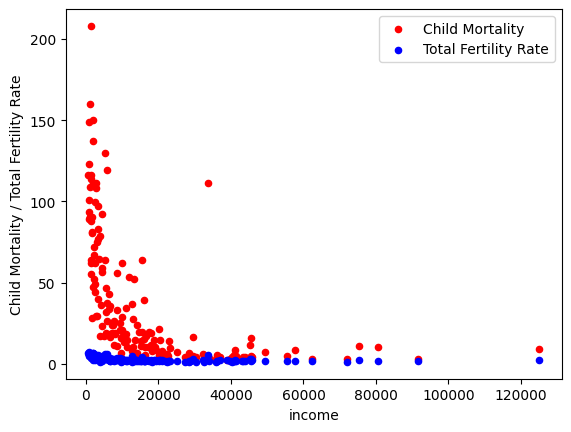

In [203]:
# features that have a negative correlation with income
ax1 = countries_df.plot(kind = 'scatter', x = 'income', y = 'child_mort', color = 'r')
ax2 = countries_df.plot(kind = 'scatter', x = 'income', y = 'total_fer', color = 'b', ax = ax1)

plt.legend(labels = ['Child Mortality', 'Total Fertility Rate'])
plt.ylabel('Child Mortality / Total Fertility Rate') 

plt.show()

+ **As income increases, child mortality rates decrease significantly**. The red points are more scattered and lower on the y-axis as income levels rise, indicating that **wealthier regions or countries have lower child mortality rates.**

+ Beyond a certain income threshold (approximately $40,000), child mortality rates stabilize and do not show significant further decreases. This is observed in the sparse red points beyond this income level, which remain low on the y-axis.

+ Beyond a certain income level, the returns on child mortality diminish. This implies that **while income is a crucial factor, other factors become more influential at higher income levels.**

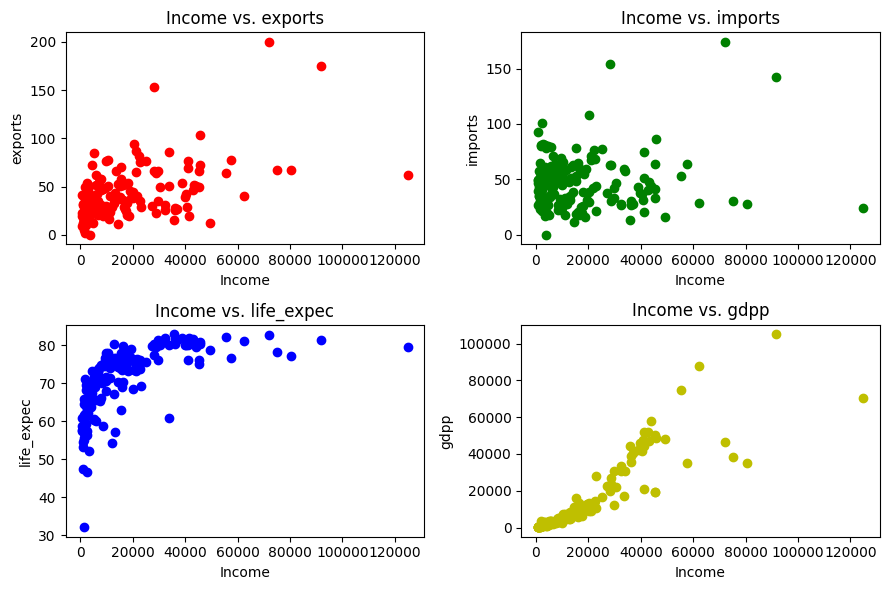

In [204]:
# Features that have high positive correlations with income
pos_cor_cols = ['exports', 'imports', 'life_expec', 'gdpp']
colors = ['r', 'g', 'b', 'y']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
ax = ax.flatten()

for i, (column, color) in enumerate(zip(pos_cor_cols, colors)):
    ax[i].scatter(x=countries_df['income'], y=countries_df[column], color=color, label=column)
    ax[i].set_title(f"Income vs. {column}")
    ax[i].set_xlabel('Income')
    ax[i].set_ylabel(column)
    
plt.tight_layout()
plt.show()


Data Distribution (Identifying Outliers)

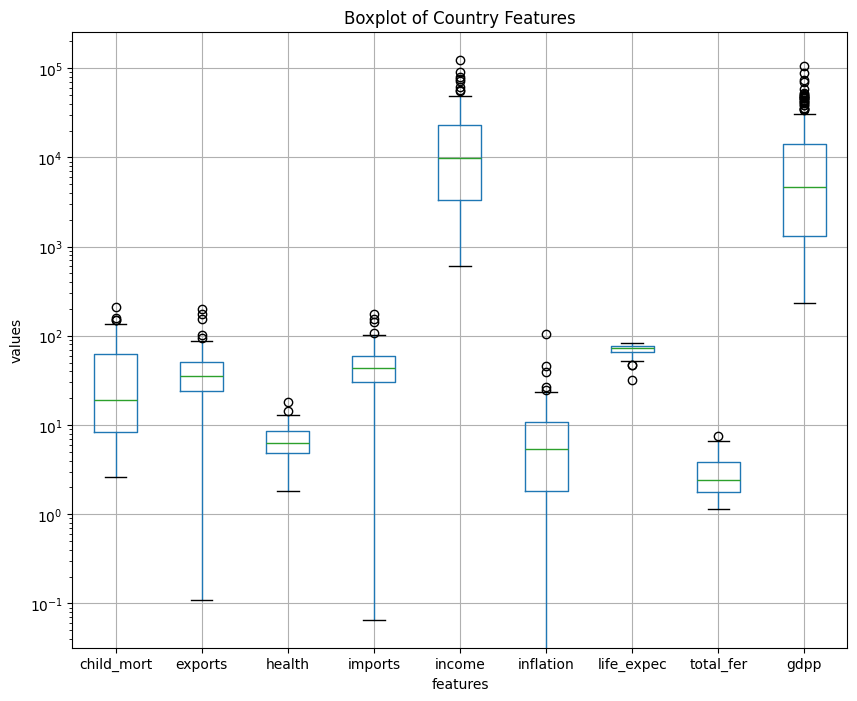

In [205]:
plt.figure(figsize=(10, 8))

# Boxplot to show distribution and outliers  
countries_df.boxplot(figsize=(12, 8))
plt.yscale('log') # use logarithmic scale on the y-axis to condense values
plt.ylabel("values")
plt.xlabel("features")
plt.title('Boxplot of Country Features')
plt.show()

In [206]:
numeric_columns = countries_df.columns.drop('country')

for column in numeric_columns:
    fig = px.choropleth(countries_df,
                    locationmode='country names', 
                    locations='country',
                    color=column,
                    title=f"Global Mapping of '{column}'",
                    color_continuous_scale='Blues')
    
    fig.update_layout(
        paper_bgcolor='white',
        width=800, 
        height=500, 
        title={
            'text': f"Global Mapping of '{column}'",
            'x': 0.5, 
            'xanchor': 'center',
            'yanchor': 'top'
        }
    )

    fig.show()


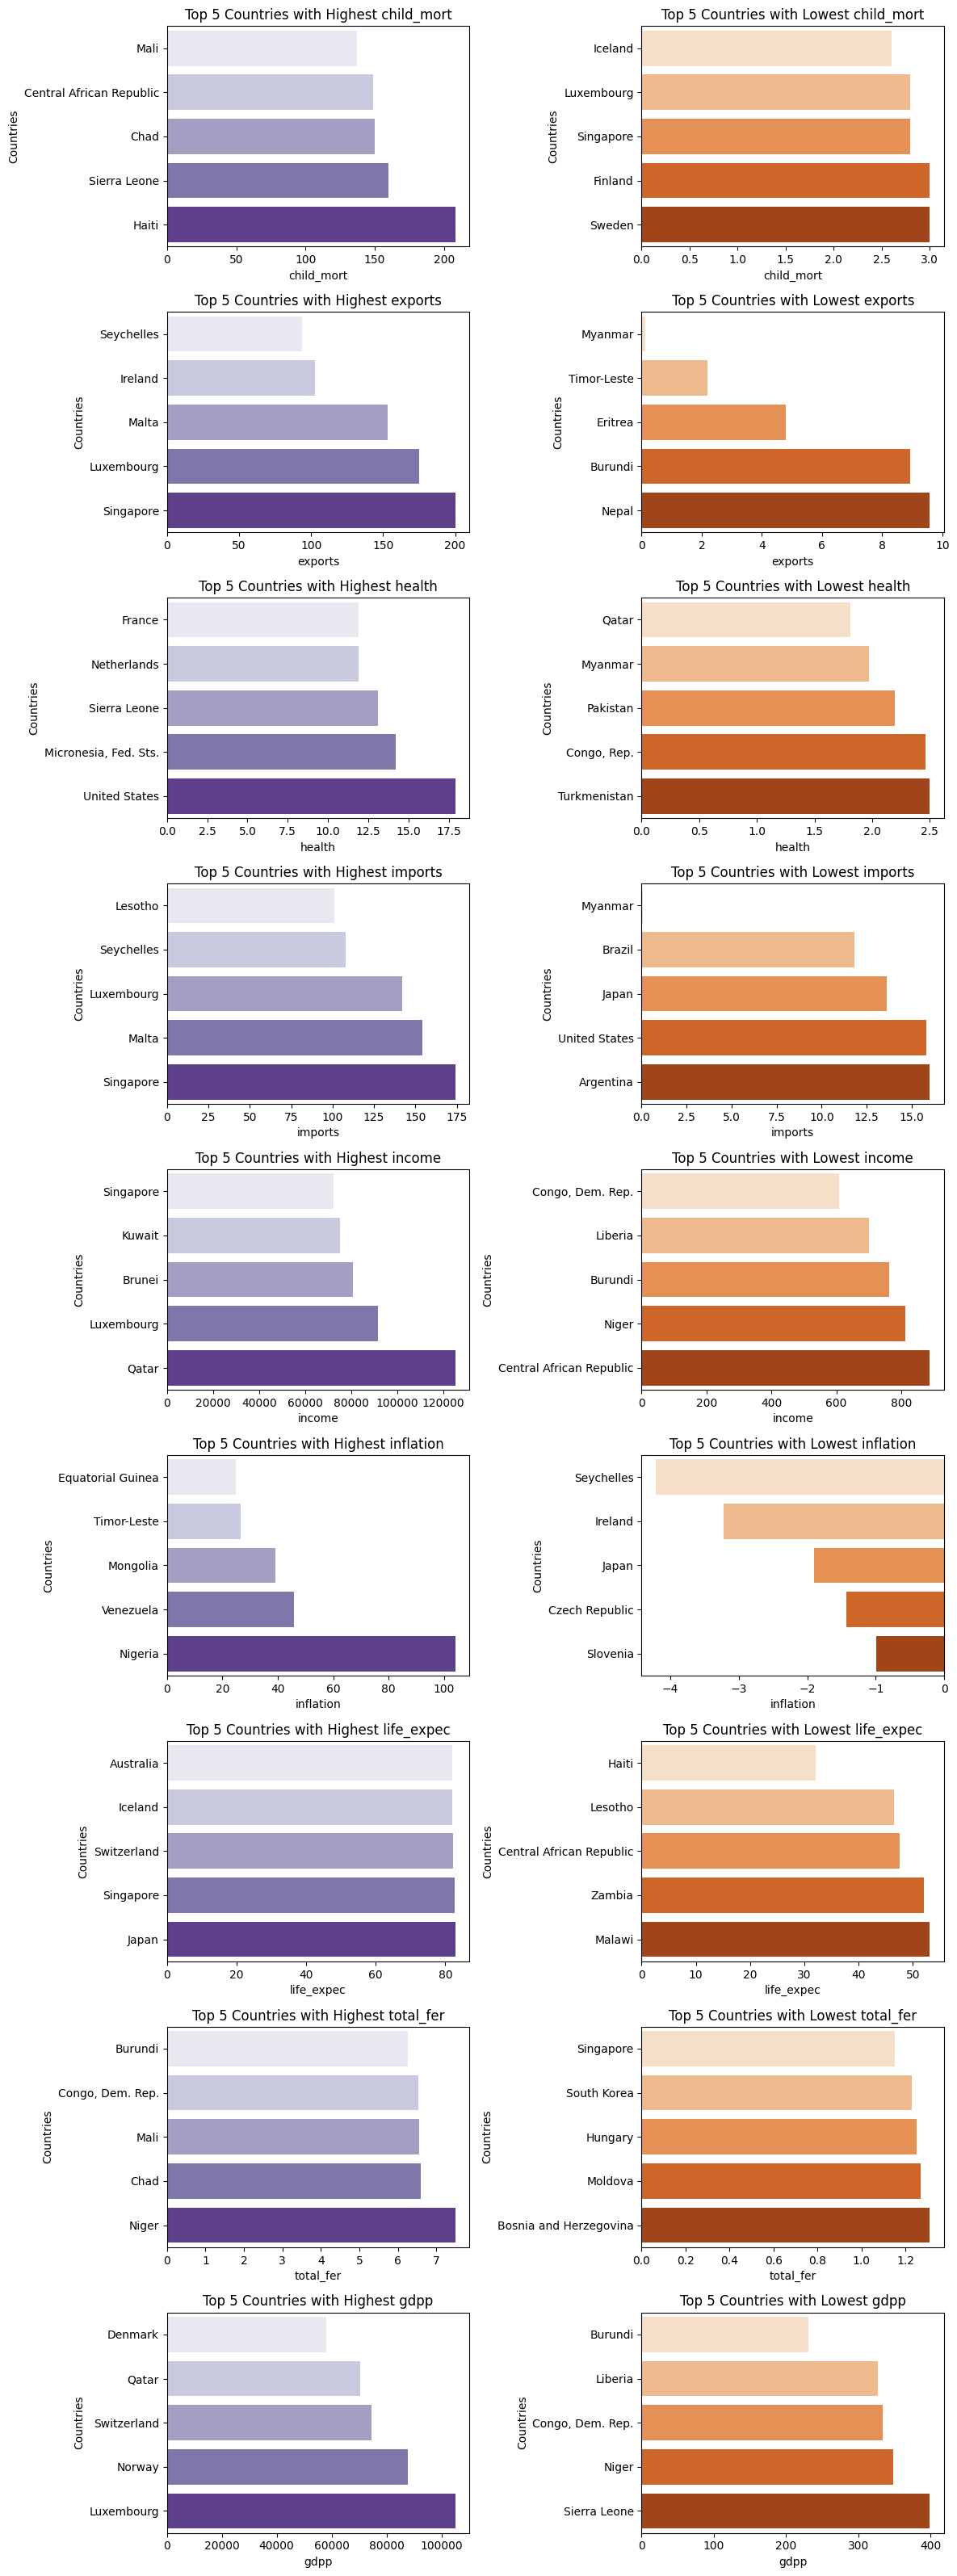

In [207]:
# Display top 5 countries with the highest and lowest values per feature
fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(12, 32))

for i, column in enumerate(numeric_columns):
    sorted_country_df = countries_df.sort_values(by=column)
    lowest_country_df = sorted_country_df.head(5)
    highest_country_df = sorted_country_df.tail(5)

    sns.barplot(ax=ax[i, 0], x=highest_country_df[column], 
                y=highest_country_df['country'], palette='Purples', 
                dodge=False, hue=highest_country_df['country'], legend=False)
    ax[i, 0].set_title('Top 5 Countries with Highest ' + column)
    ax[i, 0].set_xlabel(column)
    ax[i, 0].set_ylabel('Countries')

    sns.barplot(ax=ax[i, 1], x=lowest_country_df[column], 
                y=lowest_country_df['country'], palette='Oranges', 
                dodge=False, hue=lowest_country_df['country'], legend=False)
    ax[i, 1].set_title('Top 5 Countries with Lowest ' + column)
    ax[i, 1].set_xlabel(column)
    ax[i, 1].set_ylabel('Countries')

plt.tight_layout()
plt.show()


### Data Preprocessing

##### Check for null / duplicates (Drop them if there are any)

In [208]:
print("Count per feature with null values: ")
print(countries_df.isna().sum())

print("\nCount of duplicate values: " + str(countries_df.duplicated().sum()))

Count per feature with null values: 
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Count of duplicate values: 0


There are no null / duplicate values

##### Standardize Data using Standard Scaler
**K-means clustering** is based on Euclidean distance (the distance between points is computed using the sum of squared differences between their feature values). Standardization scales the features to have zero mean and unit variance, which ensures that all features contribute equally to the distance calculation. This can lead to more balanced clusters and better clustering results.

In [209]:
# Drop the 'country' column
country_features_df = countries_df.drop(columns=['country'])

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(country_features_df)

# Get the original column names without 'country'
column_names = country_features_df.columns

# Convert back to DataFrame and keep original column names
scaled_df = pd.DataFrame(scaled_data, columns=column_names)

scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### Dimensionality Reduction using PCA

- PCA aims to reduce the number of dimensions (features) while retaining the most variance (information) from the original data.
- By selecting components that explain a significant portion of the variance, PCA ensures that the reduced dataset still captures the essential structure and patterns.

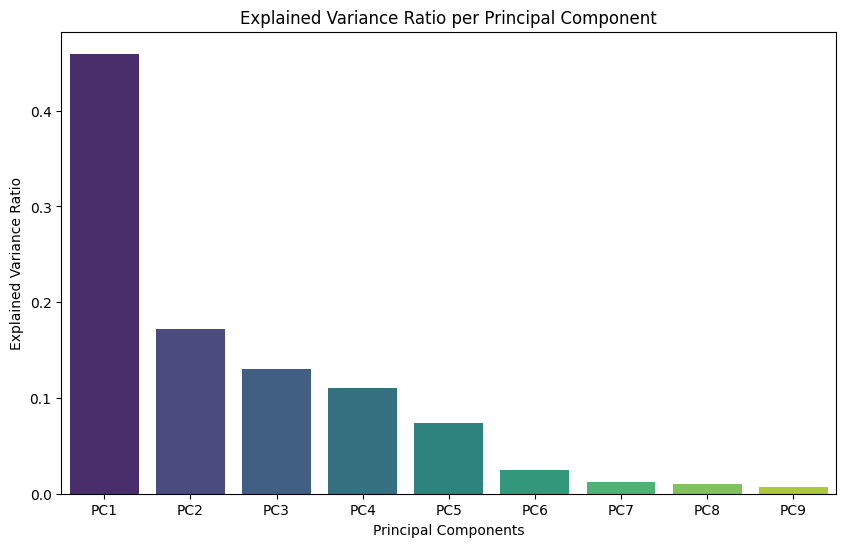

  Principal Component  Explained Variance Ratio
0                 PC1                  0.459517
1                 PC2                  0.171816
2                 PC3                  0.130043
3                 PC4                  0.110532
4                 PC5                  0.073402
5                 PC6                  0.024842
6                 PC7                  0.012604
7                 PC8                  0.009813
8                 PC9                  0.007431


In [210]:
import warnings
warnings.filterwarnings('ignore')

# Initial PCA run (PCA will consider all possible components)
pca = PCA()
df1_pca = pca.fit(scaled_df)

# Get explained variance ratio
explained_variance_ratio = df1_pca.explained_variance_ratio_

# Create a DataFrame with the principal components and their explained variance ratios
explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio
})

# Plotting the explained variance
plt.figure(figsize=(10, 6))
sns.barplot(x='Principal Component', y='Explained Variance Ratio', data=explained_variance_df, palette='viridis')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.show()

print(explained_variance_df)


From the generated PCA, we can see how the **first four (PCA 1- 4) explain roughly 86% of the distribution** of the countries data. That said, we will use **`4` as PCA's `n_components`**.

In [211]:
n_components = 4

# Second PCA run with optimal number of components
pca = PCA(n_components=n_components)
countries_PCA = pca.fit_transform(scaled_df)

### Perform Elbow analysis to determine the optimal number of clusters for KMeans

**KMeans Clustering** is an unsupervised learning algorithm used to partition data into a specified number of clusters. It assigns each data point to the nearest cluster center, then updates the cluster centers to the mean of the points in each cluster. The objective is to minimize the variance within each cluster, ensuring that clusters are compact and well-separated.

**Elbow Analysis** is a method for determining the optimal number of clusters in KMeans clustering. By plotting the sum of squared distances between data points and their cluster centers for various numbers of clusters, the "elbow" point on the plot indicates where adding more clusters yields minimal improvement, helping to select the ideal number of clusters.

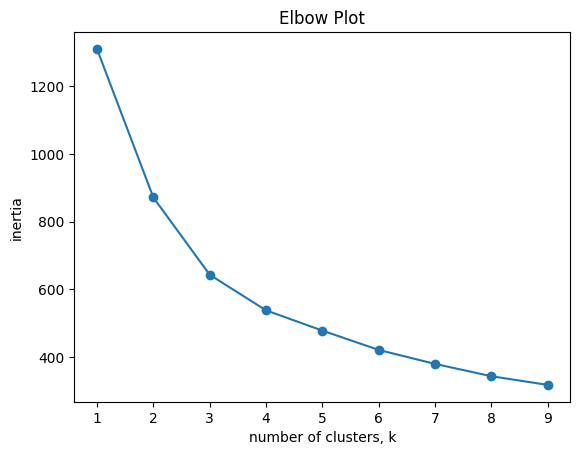

In [212]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(
        n_clusters=k,
        random_state=42,
        max_iter = 500,
        tol = 1e-04)
    model.fit(countries_PCA)
    inertias.append(model.inertia_)
    
# Elbow Plot
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.title("Elbow Plot")
plt.show()

The **elbow point** here is where `k = 3`. This is where the rate of decrease in inertia slows down significantly. This point indicates the optimal number of clusters because adding more clusters beyond this point yields diminishing returns in terms of reducing inertia.

### Running KMeans with the chosen n_clusters

In [213]:
n_clusters = 3

kmeans = KMeans(n_clusters = n_clusters, random_state=42)

kmeans.fit(countries_PCA)

# Get cluster labels
labels = kmeans.labels_

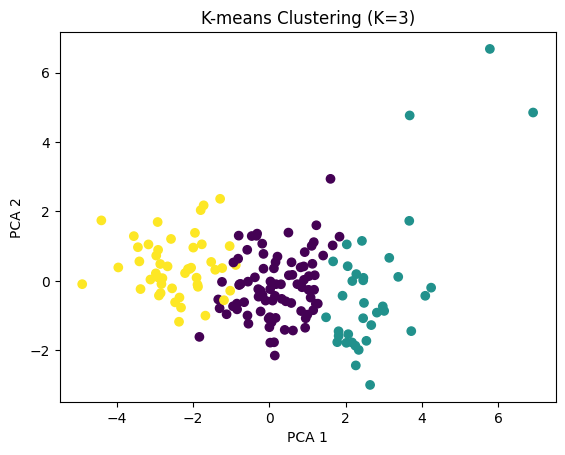

In [214]:
plt.scatter(countries_PCA[:, 0], countries_PCA[:, 1], c=labels, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

### Evaluating the quality of clustering results

+ **Silhouette Score** - measures how similar each sample is to its own cluster compared to other clusters. It ranges from -1 to +1, where:
   - `+1` indicates that the sample is very well matched to its own cluster and poorly matched to neighboring clusters.
   - `0` indicates that the sample is on or very close to the decision boundary between two neighboring clusters.
   - `-1` indicates that the sample is misclassified, meaning it is likely in the wrong cluster.
+ **Davies-Bouldin Index** - measures the average similarity ratio of each cluster with the cluster that is most similar to it. It is based on intra-cluster distances (compactness) and inter-cluster distances (separation). The index ranges from 0 to ∞, where:
   - **Lower** values indicate better clustering, with clusters that are more compact and well-separated.
   - **Higher** values indicate worse clustering, where clusters are more similar to each other or less compact.

In [216]:
silhouette_avg = silhouette_score(countries_PCA, labels)
davies_bouldin = davies_bouldin_score(countries_PCA, labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')

Silhouette Score: 0.33181002218025096
Davies-Bouldin Index: 1.1333803990123732


+ A **Silhouette Score** around `0.33` suggests that the clusters are reasonably distinct, but there is significant overlap or some data points are not clearly assigned to a single cluster.

+ A **Davies-Bouldin Index** value around `1.13` is relatively good but not excellent. It suggests that while the clusters are somewhat well-separated, there is still some overlap or similarity between clusters.

### Cluster Analysis

In [220]:
# add the cluster labels to the original dataset
countries_df['cluster'] = labels

countries_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [221]:
# Profile the clusters
stat_countries = countries_df.groupby(by='cluster')[column_names].mean()
print(stat_countries)

         child_mort    exports    health    imports        income  inflation  \
cluster                                                                        
0         21.927381  40.243917  6.200952  47.473404  12305.595238   7.600905   
1          5.000000  58.738889  8.807778  51.491667  45672.222222   2.671250   
2         92.961702  29.151277  6.388511  42.323404   3942.404255  12.019681   

         life_expec  total_fer          gdpp  
cluster                                       
0         72.814286   2.307500   6486.452381  
1         80.127778   1.752778  42494.444444  
2         59.187234   5.008085   1922.382979  


In [234]:
countries_df['cluster'] = countries_df['cluster'].astype(str)

color_map = {
    '0': 'orange',
    '1': 'blue',
    '2': 'green',
}

# Create the choropleth map
fig = px.choropleth(countries_df, 
                    locations='country', 
                    locationmode='country names', 
                    color='cluster', 
                    color_discrete_map=color_map,
                    title='Worldwide Country Labels')

fig.update_layout(
        paper_bgcolor='white',
        width=800, 
        height=500, 
        title={
            'text': "Worldwide Country Labels",
            'x': 0.5, 
            'xanchor': 'center',
            'yanchor': 'top'
        }
    )

fig.show()